# **Lab 5**

# Unsupervised Learning → Clustering

---

# K-means clustering


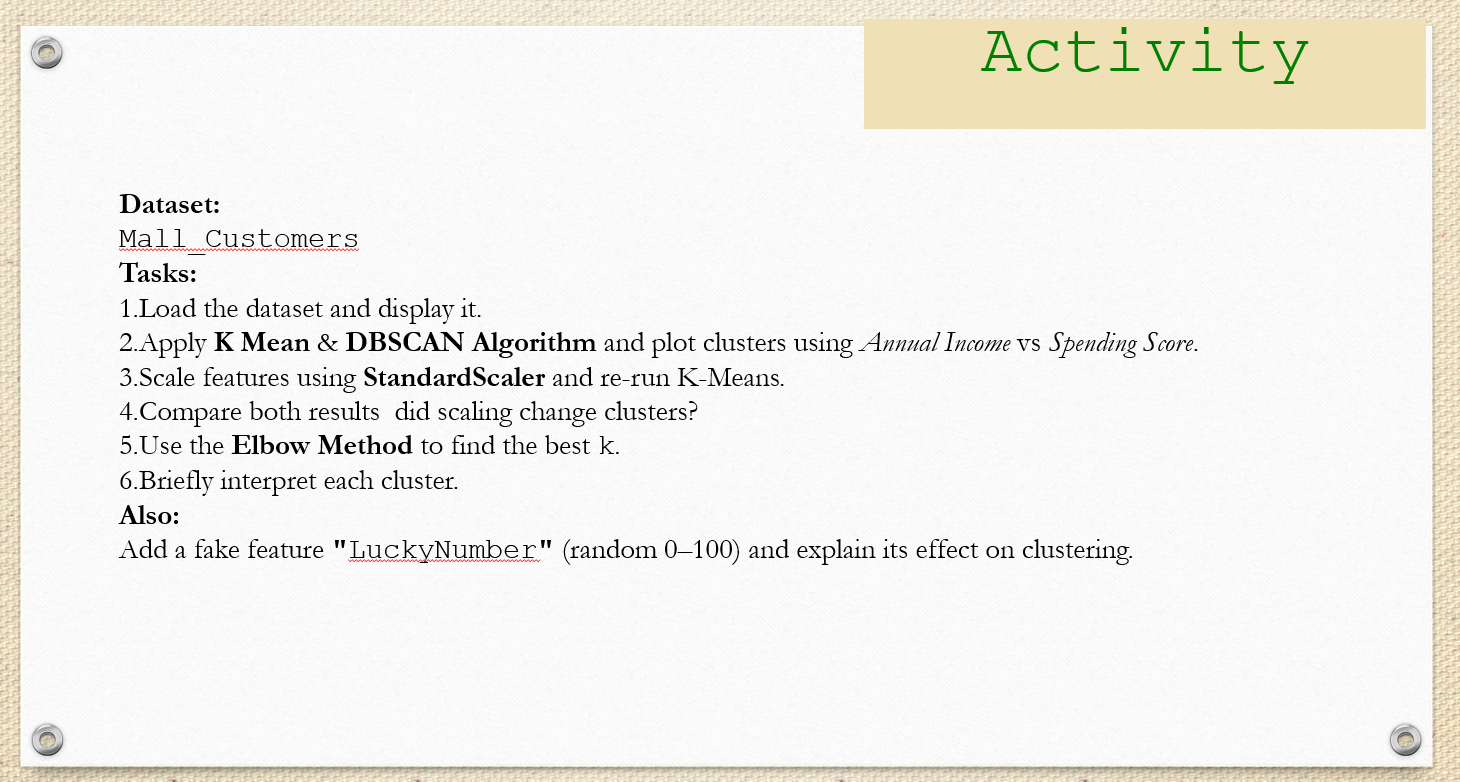


In [202]:
import pandas as pd

In [203]:
mall_df = pd.read_csv("Datasets/Mall_Customers.csv")

mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [204]:
mall_df.shape

(200, 5)

In [205]:
mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [206]:
mall_df.index = mall_df["CustomerID"]
mall_df.drop(columns=["CustomerID"], inplace=True)
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [207]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mall_df["Gender"] = le.fit_transform(mall_df["Gender"])
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [208]:
from sklearn.cluster import KMeans, DBSCAN
kmeans = KMeans(n_clusters=2, random_state=42)
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(mall_df)
kmeans.fit(mall_df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


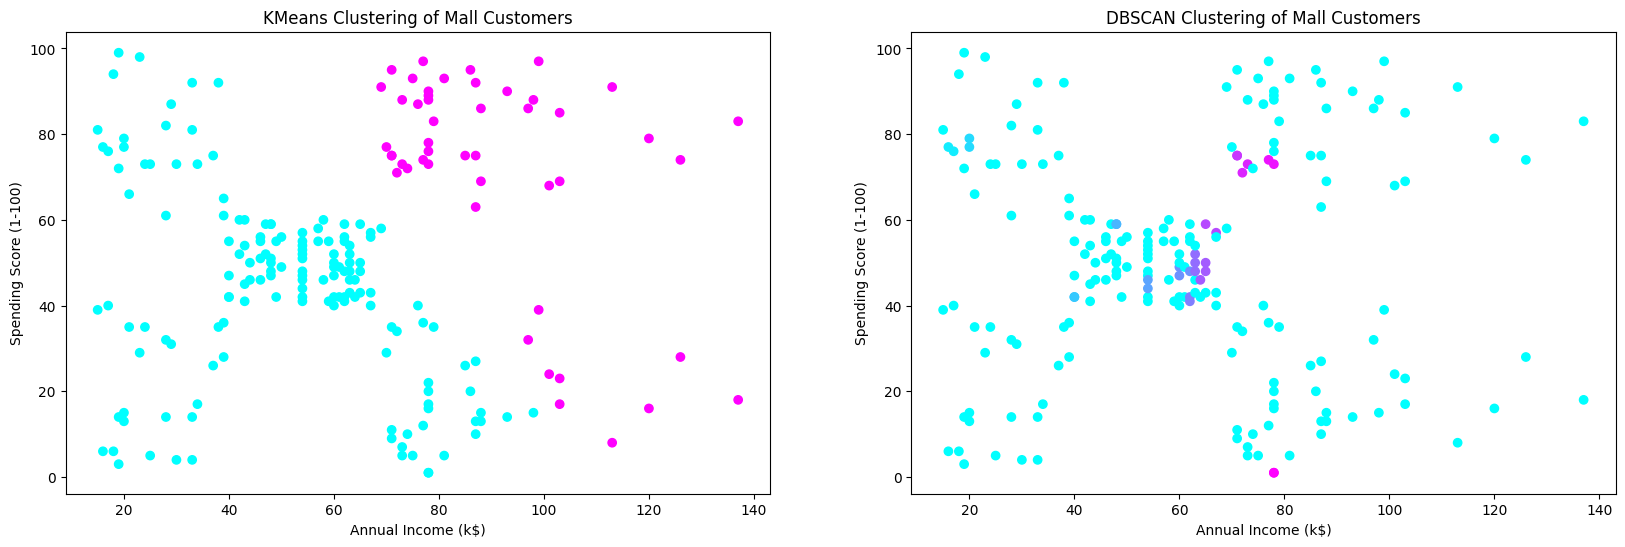

In [209]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=kmeans.labels_, cmap='cool')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering of Mall Customers")
plt.subplot(1, 2, 2)
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=dbscan.labels_, cmap='cool')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering of Mall Customers")
plt.show()

- kmeans did pretty well, dbscan is all over the place currently

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mall_scaled = scaler.fit_transform(mall_df)
mall_scaled_df = pd.DataFrame(mall_scaled, columns=mall_df.columns, index=mall_df.index)
mall_scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980


In [211]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(mall_scaled_df)
dbscan = DBSCAN(eps=0.85, min_samples=5)
dbscan.fit(mall_scaled_df)

,eps,0.85
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


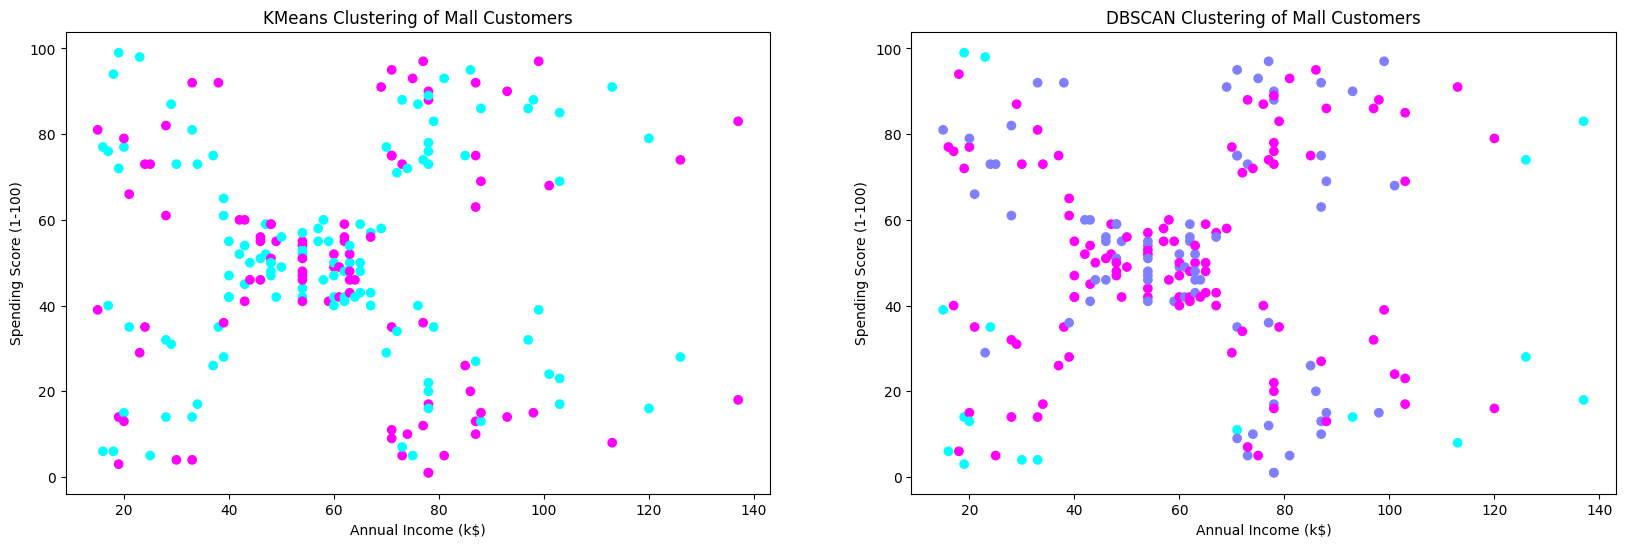

In [212]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=kmeans.labels_, cmap='cool')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering of Mall Customers")
plt.subplot(1, 2, 2)
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=dbscan.labels_, cmap='cool')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering of Mall Customers")
plt.show()

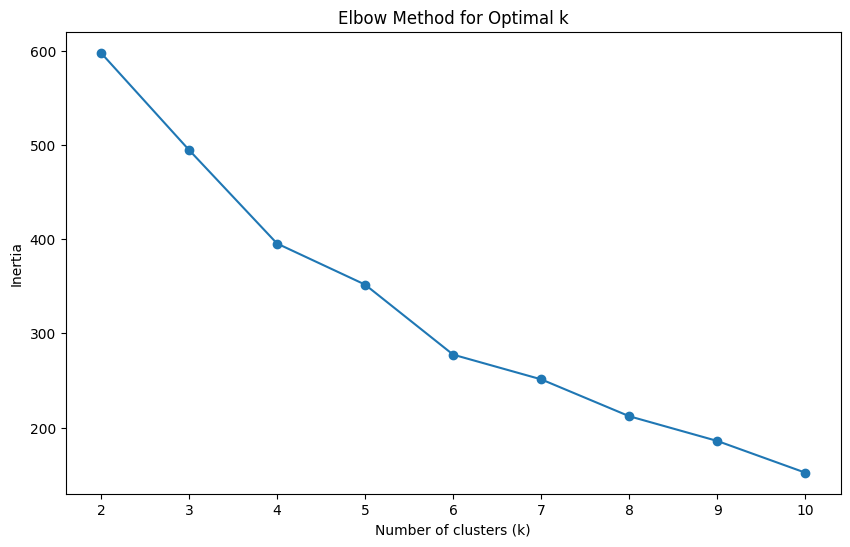

In [213]:
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mall_scaled_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [214]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(mall_scaled_df)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


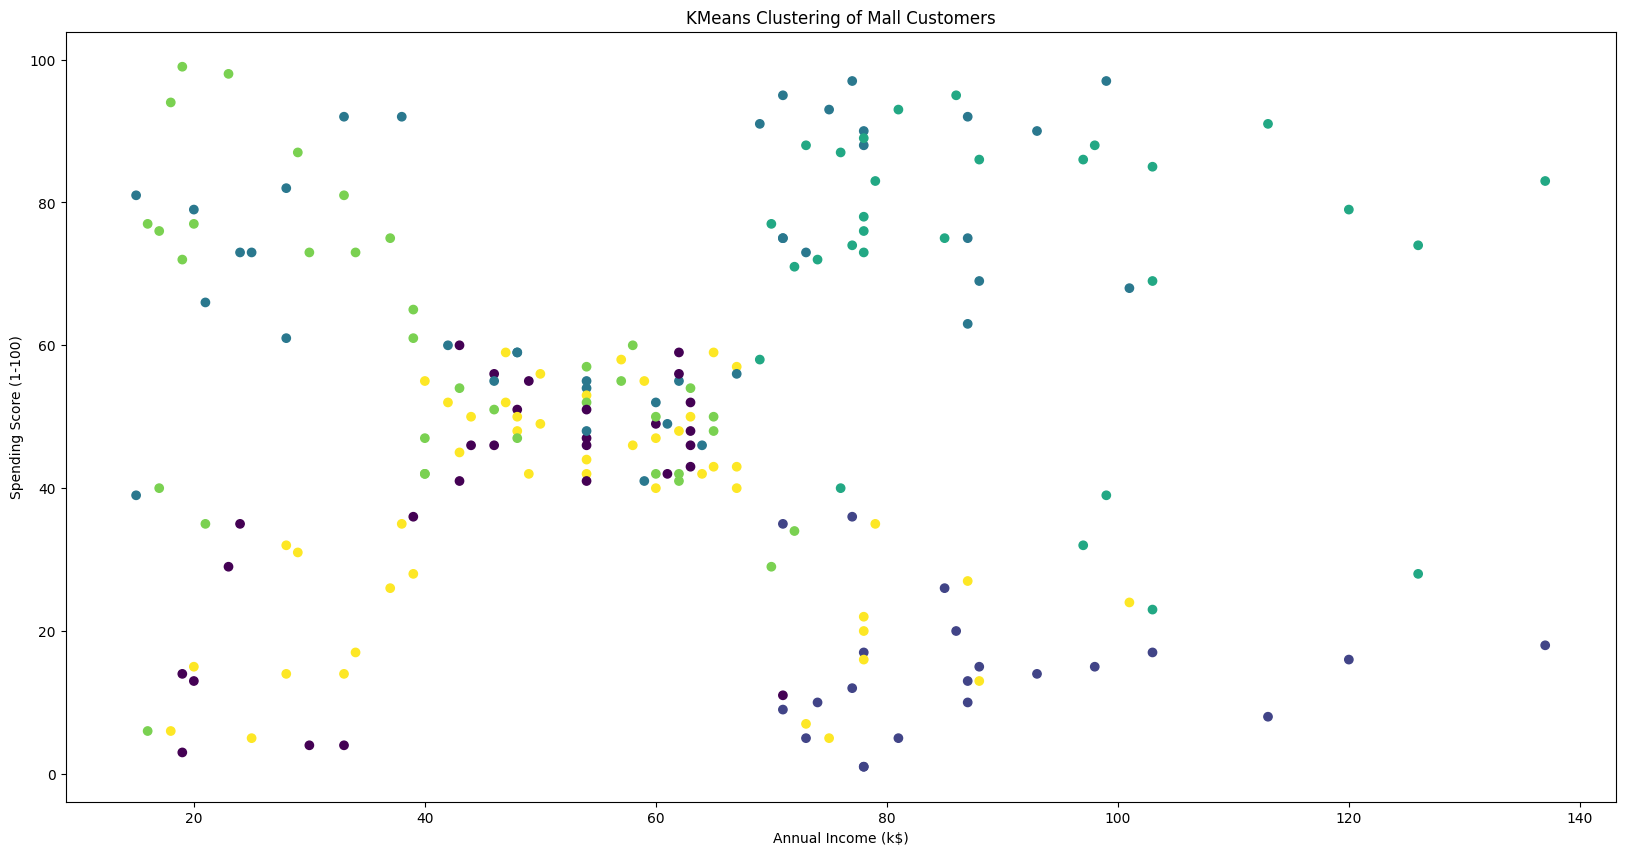

In [215]:
plt.figure(figsize=(20,10))
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=kmeans_6.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering of Mall Customers")
plt.show()

In [216]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(mall_scaled_df, kmeans.labels_)
db_score = davies_bouldin_score(mall_scaled_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f} (higher is better)")
print(f"Davies-Bouldin Index: {db_score:.3f} (lower is better)")

Silhouette Score: 0.421 (higher is better)
Davies-Bouldin Index: 0.833 (lower is better)


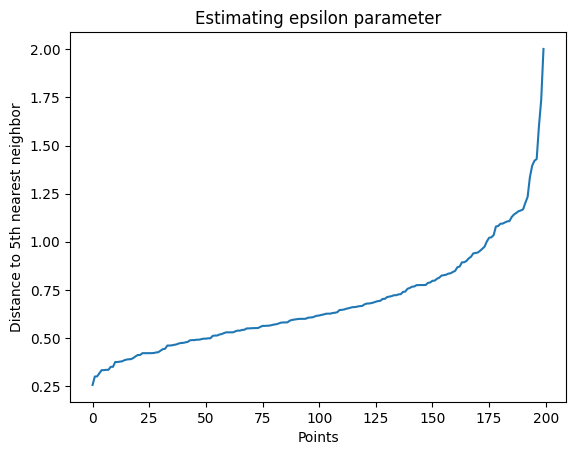

In [217]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(mall_scaled_df)
distances, indices = neighbors_fit.kneighbors(mall_scaled_df)
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('Estimating epsilon parameter')
plt.show()

In [218]:
mall_df.shape

(200, 4)

In [219]:
lucky_numbers = np.random.randint(0, 101, 200)
len(lucky_numbers)

200

In [220]:
mall_scaled_df["Lucky Number"] = lucky_numbers 
mall_scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Lucky Number
CustomerID,,,,,
1,1.128152,-1.424569,-1.738999,-0.434801,28
2,1.128152,-1.281035,-1.738999,1.195704,80
3,-0.886405,-1.352802,-1.700830,-1.715913,56
4,-0.886405,-1.137502,-1.700830,1.040418,74
5,-0.886405,-0.563369,-1.662660,-0.395980,49


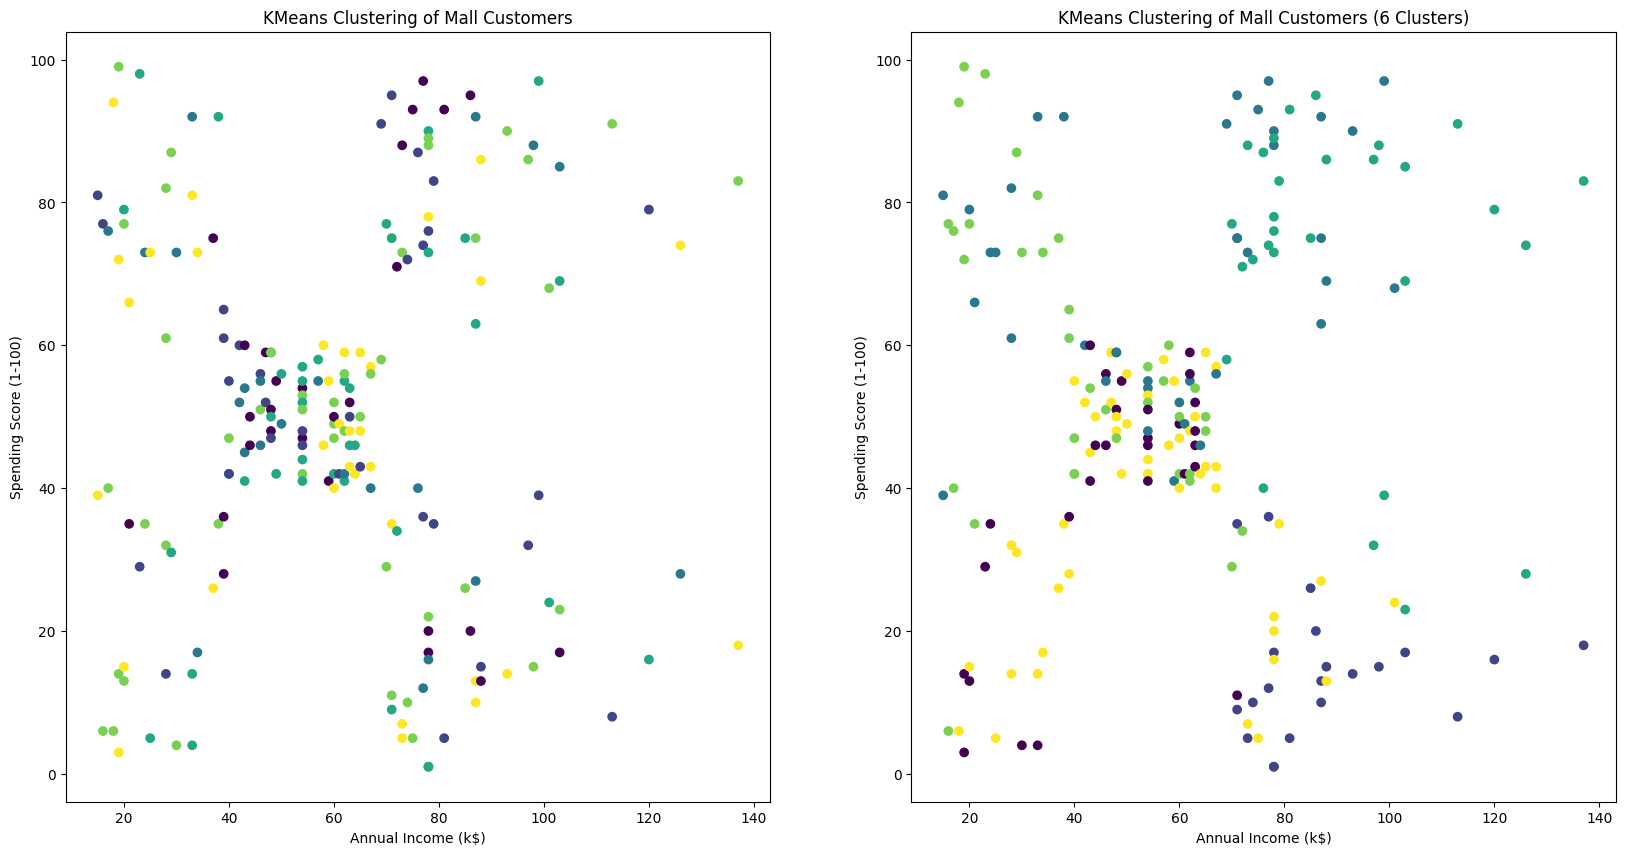

In [221]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(mall_scaled_df)

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=kmeans.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering of Mall Customers")
plt.subplot(1, 2, 2)
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c=kmeans_6.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering of Mall Customers (6 Clusters)")
plt.show()

              Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                                   
1           1.128152 -1.424569           -1.738999               -0.434801   
2           1.128152 -1.281035           -1.738999                1.195704   
3          -0.886405 -1.352802           -1.700830               -1.715913   
4          -0.886405 -1.137502           -1.700830                1.040418   
5          -0.886405 -0.563369           -1.662660               -0.395980   

            Lucky Number  
CustomerID                
1                     28  
2                     80  
3                     56  
4                     74  
5                     49  


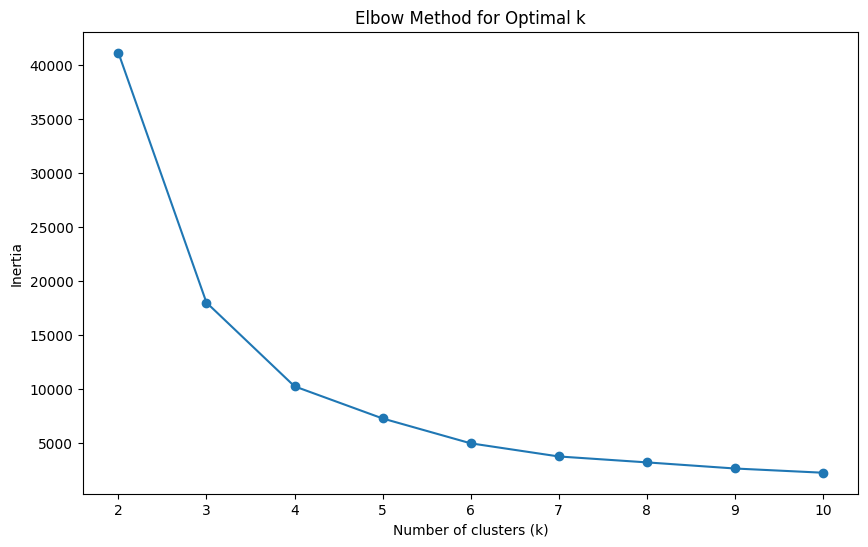

In [222]:
print(mall_scaled_df.head(5))
print("==========================================")
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mall_scaled_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()